In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [19]:
# Read the CSV file
file_path = '../cme_and_electron/cme_josias_10MeV.csv'
df = pd.read_csv(file_path)

In [21]:
def plot_sorted_distributions(y_train, y_val, y_test, title='Sorted Distributions'):
    """
    Plots the sorted target variable distributions for the training, validation, and test sets.
    
    :param:
    - y_train: Numpy array containing the training set target variable
    - y_val: Numpy array containing the validation set target variable
    - y_test: Numpy array containing the test set target variable
    - title: Title for the plot
    """
    plt.figure(figsize=(12, 6))

    # Sort and plot the target variable for each set
    plt.plot(np.sort(y_train), label='Train', marker='o')
    plt.plot(np.sort(y_val), label='Validation', marker='x')
    plt.plot(np.sort(y_test), label='Test', marker='s')

    plt.xlabel('Index')
    plt.ylabel('log_peak_intensity')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

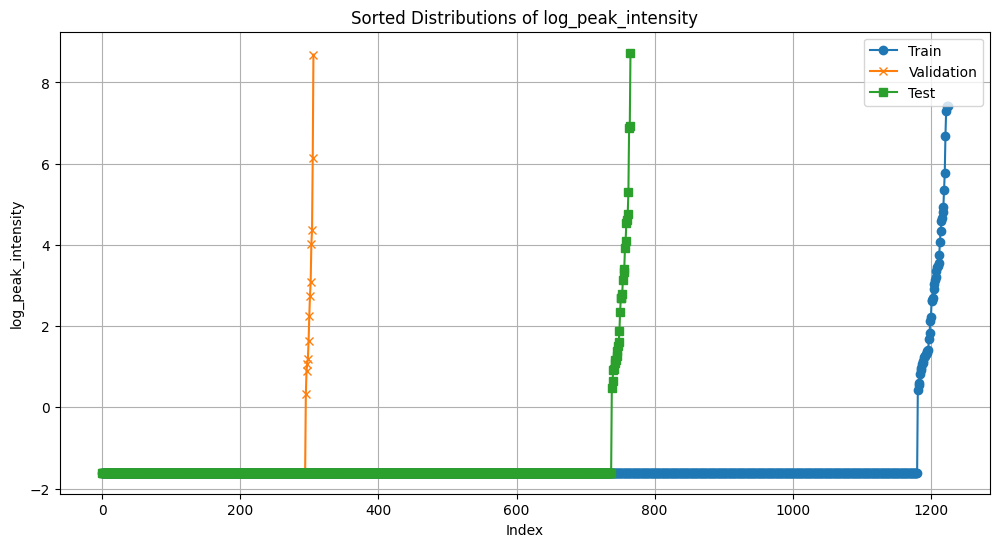

In [22]:
plot_sorted_distributions(train_y, val_y, test_y, title='Sorted Distributions of log_peak_intensity')

In [15]:
import random


def find_optimized_random_batch_size(y, threshold=np.log(10), num_trials=1000, early_exit_ratio=0.95):
    """
    Optimized function to find the minimum batch size such that, when sampled at random,
    each batch is likely to contain at least 2 rows with target values greater than a given threshold.
    
    Parameters:
    - y: Numpy array containing the target values
    - threshold: The target threshold, default is ln(10)
    - num_trials: Number of trials to perform for each batch size
    - early_exit_ratio: The success ratio to achieve before stopping the trials for a given batch size
    
    Returns:
    - Minimum batch size that fulfills the condition
    """
    # Count the number of elements greater than the threshold
    count_above_threshold = np.sum(y > threshold)

    # If there are fewer than 2 elements above the threshold, return a message
    if count_above_threshold < 2:
        raise ValueError("There are not enough samples with target values greater than the threshold.")

    # Loop through possible batch sizes, starting from 2
    for batch_size in range(2, len(y) + 1):
        print(batch_size)
        success_count = 0

        for trial in range(num_trials):
            # Sample a random batch
            random_batch = random.sample(list(y), batch_size)

            # Check if the batch contains at least 2 elements greater than the threshold
            if np.sum(np.array(random_batch) > threshold) >= 2:
                success_count += 1

            # Early exit if success ratio is achieved
            if trial >= 5000 and success_count / (trial + 1) >= early_exit_ratio:
                return batch_size

In [ ]:
# Find the minimum batch size for the training set that satisfies the condition, using the optimized function
min_optimized_random_batch_size = find_optimized_random_batch_size(shuffled_train_y, num_trials=50000,
                                                                   early_exit_ratio=0.99)
min_optimized_random_batch_size

In [16]:
training_set_path = 'D:/College/Fall2023/sep-forecasting-research/data/electron_cme_data_split/training'

In [17]:
from modules.training.ts_modeling import build_dataset

In [18]:
X_train, y_train = build_dataset(training_set_path, inputs_to_use=['e0.5'], add_slope=False)

In [19]:
# print the result of np.log(353)
print(np.log(353))

5.8664680569332965


In [20]:
# find the minimum batch size for the training set that satisfies the condition, using the optimized function
min_optimized_random_batch_size = find_optimized_random_batch_size(y_train, threshold=4.9, num_trials=2000,
                                                                   early_exit_ratio=0.99)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

KeyboardInterrupt: 

In [ ]:
# find the minimum batch size for the training set that satisfies the condition, using the optimized function
min_optimized_random_batch_size2 = find_optimized_random_batch_size(y_train, threshold=4, num_trials=2000,
                                                                   early_exit_ratio=0.99)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

In [ ]:
min_optimized_random_batch_size2

In [ ]:
# find the minimum batch size for the training set that satisfies the condition, using the optimized function
